Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as prp
from scipy.stats import shapiro, kstest, mannwhitneyu

In [2]:
df = pd.read_csv('../data/А_B_cookie_cats.csv')
df.head(20)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


Нулевых строк нет

In [4]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


Смотрим чистоту данных.

In [5]:
# смотрим есть ли повторения в id пользовотелей
len(df['userid'].unique())

90189

Повторений в id пользователей нет

In [6]:
# Смотрим есть ли недопустимые значения в столбце version
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

In [7]:
# Смотрим есть ли недопустимые значения в столбце retention_1
df['retention_1'].unique()

array([0, 1])

In [41]:
# Смотрим есть ли недопустимые значения в столбце retention_7
df['retention_7'].unique()

array([0, 1])

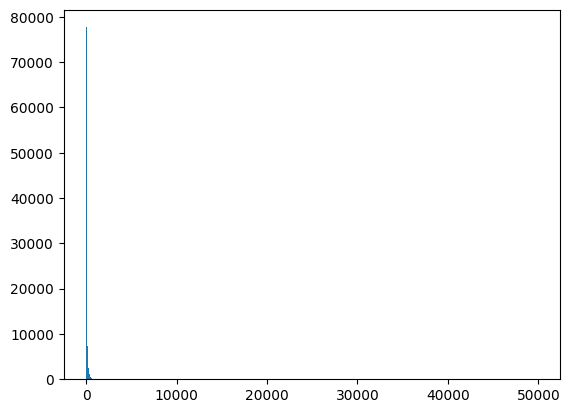

In [52]:
# Смотрим есть ли недопустимые значения в столбце sum_gamerounds
plt.figure()
plt.hist(df['sum_gamerounds'], bins=500);

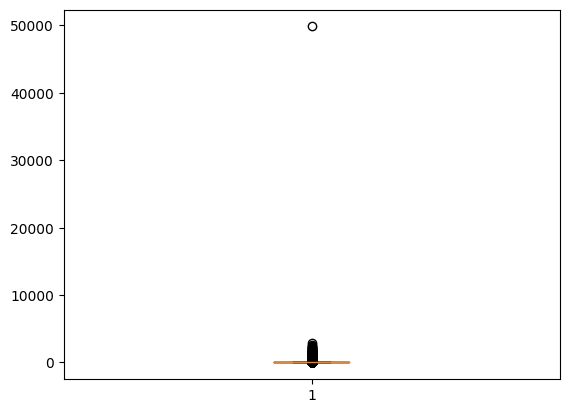

In [53]:
# Смотрим есть ли недопустимые значения в столбце sum_gamerounds
plt.figure()
plt.boxplot(df['sum_gamerounds']);

In [10]:
df.loc[df['sum_gamerounds'] > 1000].sort_values(by='sum_gamerounds')

,userid,version,sum_gamerounds,retention_1,retention_7
82405,9129983,gate_40,1002,1,1
69407,7693207,gate_30,1009,1,1
31352,3488470,gate_30,1010,1,1
31902,3546981,gate_30,1011,1,1
22585,2515221,gate_40,1013,1,1
...,...,...,...,...,...
48188,5346171,gate_40,2294,1,1
43671,4832608,gate_30,2438,1,1
29417,3271615,gate_40,2640,1,0
7912,871500,gate_30,2961,1,1


В столбце sum_gamerounds есть одно очень большое значение которое вносит помехи в данные. Строчку с этими данными удалим.

In [11]:
df_new = df.drop(index=57702)
df_new.sort_values(by='sum_gamerounds')

,userid,version,sum_gamerounds,retention_1,retention_7
46551,5159863,gate_40,0,0,0
79246,8773542,gate_30,0,0,0
50705,5620952,gate_40,0,0,0
59059,6538238,gate_40,0,0,0
4039,446820,gate_30,0,0,0
...,...,...,...,...,...
46344,5133952,gate_30,2251,1,1
48188,5346171,gate_40,2294,1,1
43671,4832608,gate_30,2438,1,1
29417,3271615,gate_40,2640,1,0


In [12]:
df_new.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


In [13]:
df_new[df_new['sum_gamerounds'] == 0]

,userid,version,sum_gamerounds,retention_1,retention_7
6,1066,gate_30,0,0,0
11,2101,gate_30,0,0,0
26,3095,gate_30,0,0,0
35,4076,gate_40,0,0,0
37,4176,gate_30,0,0,0
...,...,...,...,...,...
90067,9986185,gate_30,0,0,0
90093,9988600,gate_40,0,0,0
90116,9990773,gate_30,0,0,0
90147,9994604,gate_30,0,0,0


Распределение метрики sum_gamerounds похоже на экспоненциальное. Проверим распределение данной метрики на нормальность

In [48]:
# Проверяем sum_gamerounds на нормальность применив тест колмогорова - смирнова
kstest(df_new['sum_gamerounds'], 'norm')

KstestResult(statistic=0.8715595323087064, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [49]:
# Проверяем sum_gamerounds на нормальность применив тест шапиро-вилко
shapiro(df_new['sum_gamerounds'])

/home/anatoliy/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.48558658361434937, pvalue=0.0)

Распределение метрики sum_gamerounds не является нормальным.

Проверим метрику retention_1 на статистическую значимость.

In [56]:
df_new.loc[df_new['retention_1'] == 1, ['version']].value_counts()

version
gate_40    20119
gate_30    20034
dtype: int64

In [57]:
k1, k2 = df_new.loc[df_new['retention_1'] == 1, ['version']].value_counts()
print(k1,k2)

20119 20034


In [58]:
n1, n2 = df_new['version'].value_counts()
print(n1,n2)

45489 44699


In [60]:
# проведём непараметрический тест хи квадрат
prp.proportions_chisquare(np.array([k1,k2]), np.array([n1,n2]))

(3.19373895460949,
 0.07392076034183397,
 (array([[20119., 25370.],
         [20034., 24665.]]),
  array([[20252.35970417, 25236.64029583],
         [19900.64029583, 24798.35970417]])))

In [61]:
# проведём z - тест
prp.proportions_ztest(np.array([k1,k2]), np.array([n1,n2]))

(-1.787103509763628, 0.0739207603418346)

Статистически значимые отличия в группах отсутствуют.

Проверим метрику retention_7 на статистическую значимость.

In [62]:
df_new.loc[df_new['retention_7'] == 1, ['version']].value_counts()

version
gate_30    8501
gate_40    8279
dtype: int64

In [63]:
k1, k2 = df_new.loc[df_new['retention_7'] == 1, ['version']].value_counts()

In [64]:
df_new['version'].value_counts()

gate_40    45489
gate_30    44699
Name: version, dtype: int64

In [65]:
# проведём непараметрический тест хи квадрат
prp.proportions_chisquare(np.array([k1,k2]), np.array([n1,n2]))

(0.4120535291267389,
 0.5209290510671231,
 (array([[ 8501., 36988.],
         [ 8279., 36420.]]),
  array([[ 8463.49203885, 37025.50796115],
         [ 8316.50796115, 36382.49203885]])))

In [66]:
# проведём z - тест
prp.proportions_ztest(np.array([k1,k2]), np.array([n1,n2]))

(0.6419139577285584, 0.5209290510671218)

Статистически значимыx отличий в группах нет.

Проверим метрику sum_gamerounds на статистическую значимость.

In [67]:
# применим критерий Манна-Уитни
mannwhitneyu(df_new.loc[df_new['version'] == 'gate_30', ['sum_gamerounds']], df_new.loc[df_new['version'] == 'gate_40', ['sum_gamerounds']])

MannwhitneyuResult(statistic=array([1.02428576e+09]), pvalue=array([0.05089155]))

Результаты протиыоречивые, проведём дополнительно t-тест, так как выборка большого размера.